In [88]:
# Import libraries and define the dataframe

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from wordcloud import WordCloud



df_wine = pd.read_csv("wine.csv")

# Search for null values and field names
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1103 non-null   int64  
 1   country      1103 non-null   object 
 2   description  1103 non-null   object 
 3   designation  834 non-null    object 
 4   points       1103 non-null   int64  
 5   price        1046 non-null   float64
 6   province     1103 non-null   object 
 7   region_1     930 non-null    object 
 8   region_2     492 non-null    object 
 9   variety      1103 non-null   object 
 10  winery       1103 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 94.9+ KB


Summary of Brief EDA


Data is largley descriptive (text based) with 2 numerical (points and price discarding record id).  A lot of it is categorical (country, province,variety,region_1 and 2, winery and variety).  As region_1 and 2 have a lot of missing values and may be dependent on province, we could look at null values by province to see if there is a relationship.  

As we are only interested in looking at wine types for varieties: 'Cabernet Sauvignon','Pinot Noir','Chardonnay', I will only consider missing data in this subset.  From this the missing values are:

Data missing: designation(98), price(5), region_1(21), region_2(61).


Missing price values seem to be all under the category of Pinot Noir.  Therefore this may indicate the values are MAR.  The values could potentially be imputed by looking at other Pinot Noirs with similar point scores.

With the missing regions, they could potentially be imputed by looking at province in some way.

As the task only requires the use of the variety, points and province data items and none of these are missing, I am going to leave the data as it is in the subset containing:'Cabernet Sauvignon','Pinot Noir','Chardonnay'.


In [89]:
# Define the subset of the data (used above) and look at the information for task above

df_task = df_wine[df_wine['variety'].isin(['Cabernet Sauvignon','Pinot Noir','Chardonnay'])]
df_task.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 1095
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   320 non-null    int64  
 1   country      320 non-null    object 
 2   description  320 non-null    object 
 3   designation  232 non-null    object 
 4   points       320 non-null    int64  
 5   price        315 non-null    float64
 6   province     320 non-null    object 
 7   region_1     299 non-null    object 
 8   region_2     259 non-null    object 
 9   variety      320 non-null    object 
 10  winery       320 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 30.0+ KB


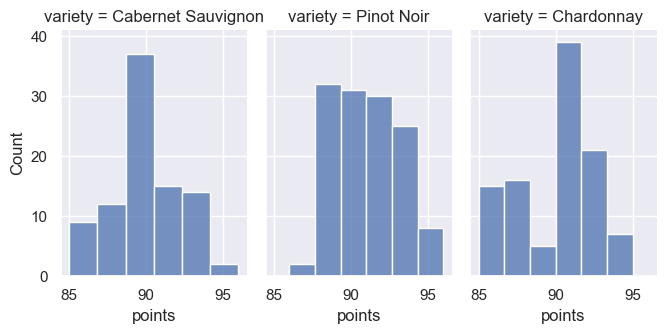

In [90]:
# Draw Histograms on milti grid showing points for aech variety.
g = sns.FacetGrid(df_task, col="variety", height=3.5, aspect=.65)
g.map(sns.histplot, "points",bins=6)

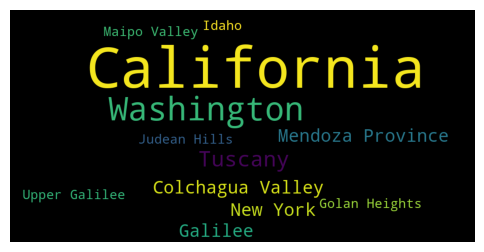

In [101]:
from collections import Counter # used to easily convert a list into a dictionary so the word cloud is based on frequency of the occurance of the word.

# Define suset dataframes for each varoety
df_cs = df_task[df_task['variety']=='Cabernet Sauvignon']
df_pn=df_task[df_task['variety']=='Pinot Noir']
df_ch=df_task[df_task['variety']=='Chardonnay']

# Process the Cabinet Sauvignon data. Put the contents of province into a list and then produce a dictionary showing the frequency of each word in the list  
wordlist = df_cs['province'].tolist()
cs_dict=Counter(wordlist)

# WordCloud object takes the word frequency from the cs_dict (dictionary) when deciding how prominent the word is in the final picture.
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(cs_dict)
plt.figure(figsize=(6,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title="Caberbet Sauvignon"
plt.show()

# The process above is then repeated for the other two categories of variety and the code is the same apart from where these need to be referenced.

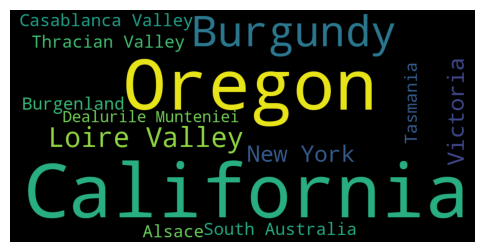

In [102]:
# Pinot Noir variety
wordlist = df_pn['province'].tolist()
pn_dict=Counter(wordlist)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(pn_dict)
plt.figure(figsize=(6,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title="Pinot Noir"
plt.show()

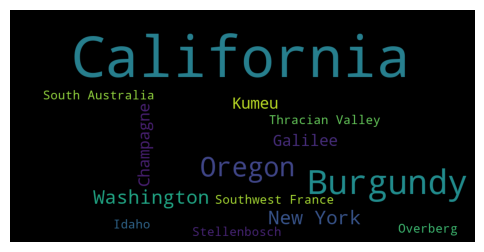

In [103]:
wordlist = df_ch['province'].tolist()
ch_dict=Counter(wordlist)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(ch_dict)
plt.figure(figsize=(6,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title="Chardonnay"
plt.show()
plt.close()